## 基于GP的集成学习
集成学习是机器学习中的一种强大方法,它通过组合多个基础模型(也叫基学习器)的预测结果来获得比单个模型更好的预测性能。这就像是在现实生活中,我们遇到重要决策时,会咨询多位专家的意见,然后综合他们的建议来做出最终决定。

用一个具体的例子来说明:

假设我们要预测明天是否会下雨。我们可以建立三个不同的基础模型:
- 模型A: 主要基于温度和湿度数据
- 模型B: 主要基于气压和风向数据
- 模型C: 主要基于历史天气模式

每个模型都会给出自己的预测:
- 模型A预测:下雨(置信度65%)
- 模型B预测:不下雨(置信度55%)
- 模型C预测:下雨(置信度70%)

集成学习会将这些预测结合起来做出最终决策。最简单的方式是多数投票:两个模型预测下雨,一个预测不下雨,所以最终预测是下雨。更复杂的方法会考虑每个模型的置信度和历史准确率。

在实际应用中,最常见的集成学习方法包括:

随机森林(Random Forest): 通过构建多棵决策树,每棵树使用随机选择的特征和数据样本,然后对所有树的预测结果进行投票。

Bagging: 从原始数据集中重复随机抽样创建多个训练集,每个训练集训练一个模型,最后组合所有模型的预测。

Boosting: 迭代训练多个模型,每个新模型特别关注前面模型预测错误的样本,最终将所有模型的预测加权组合。

这就像是把多个"专家"的意见智能地结合起来,充分利用每个专家的优势,从而得到一个更可靠的预测系统。

**GP是一种基于种群的优化算法，非常适合用于集成学习。**

### 集成学习与多agent的区别

集成学习的核心特点：
1. 目标单一：所有基础模型都在解决同一个预测问题，比如都在预测"明天是否下雨"。
2. 无交互：基础模型之间不会互相通信或协商，它们独立地做出预测。
3. 组合方式固定：使用预先设定的规则（如投票、加权平均）来合并预测结果。
4. 训练后静态：一旦训练完成，模型的行为就相对固定。

而多Agent系统则很不一样：
1. 目标多样：不同Agent可以有不同的目标和专长。比如在一个智能家居系统中，一个Agent负责温度控制，另一个负责照明，还有一个负责安保。
2. 动态交互：Agent之间可以相互通信、协商和学习。它们能根据其他Agent的行为调整自己的决策。
3. 自主决策：每个Agent都有一定的自主性，可以根据环境变化做出灵活的决策。
4. 环境适应：Agent们能够感知环境变化并实时调整策略。

用一个具体例子来说明差异：

假设我们要管理一个智能建筑：

集成学习方案：
多个模型分别预测建筑的能源消耗，然后用固定的方式组合这些预测结果。每个模型专注于同一个预测任务，不会有其他互动。

多Agent系统方案：
- 温控Agent监控温度并控制空调
- 照明Agent管理灯光系统
- 能源Agent优化总体用电
- 人流Agent监控建筑使用情况

这些Agent会互相沟通。比如，人流Agent发现某层楼没人时，会通知温控Agent和照明Agent相应调整；能源Agent发现用电高峰时，会与其他Agent协商削减能耗的策略。

从学习的角度看：
- 集成学习像是多个专家在考试前各自准备，考试时独立作答，最后取平均分。
- 多Agent系统更像是一个团队在不断互相学习和配合，能随时调整策略应对新情况。

### 评估函数
对于集成学习，多样性非常重要。因此，在评估个体时，建议使用随机决策树或其他随机性较高的算法。这样可以产生多样性的GP个体。
随机决策树是指在决策树算法中，随机选择特征进行分裂。在sklearn中，可以通过设置splitter="random"来实现。

#### 理解随机评估函数

想象你是一位医生，需要判断病人是否患感冒。你有三个指标可以看：
- 体温
- 咳嗽程度
- 疲劳程度

传统方式（splitter="best"）：
医生每次都按照固定的顺序检查：
1. 先看体温（因为这是最准确的指标）
2. 如果体温正常，再看咳嗽
3. 最后才看疲劳程度

这就像一个固定的决策流程：
```
是否发烧 > 38度？
├── 是 → 判断为感冒
└── 否 → 继续检查咳嗽
    ├── 严重咳嗽 → 判断为感冒
    └── 轻微咳嗽 → 检查疲劳程度
```

随机方式（splitter="random"）：
医生每次随机选择检查顺序：
- 有时候可能先看咳嗽
- 有时候可能先看疲劳
- 有时候可能先看体温

比如可能是这样：
```
严重咳嗽吗？
├── 是 → 判断为感冒
└── 否 → 检查体温
    ├── 发烧 → 判断为感冒
    └── 正常 → 检查疲劳程度
```

为什么这样做有帮助？
想象你让10位医生一起诊断。如果他们都用相同的固定顺序，可能会犯同样的错误。但如果每位医生用不同的随机顺序检查，他们更可能发现其他人忽略的情况。这就是"多样性"的价值。

在机器学习中：
```python
# 固定方式
clf1 = DecisionTreeClassifier(splitter="best")  
# 每次都是: 体温 -> 咳嗽 -> 疲劳

# 随机方式
clf2 = DecisionTreeClassifier(splitter="random") 
# 可能是: 咳嗽 -> 体温 -> 疲劳
# 也可能是: 疲劳 -> 咳嗽 -> 体温
# 每次都不一样
```

当我们把多个使用随机分裂的决策树组合在一起时（比如在随机森林中），每棵树都会以不同的方式看待问题，这样整体的判断会更准确、更可靠。

In [1]:
from sklearn.datasets import load_iris

# 还是鸢尾花问题，输入为X，输出为y
X,y=load_iris(return_X_y=True)

# 目标是最大化分类精度
def evalFeatureEngineering(trees):
    # 创建新特征
    new_features = []
    for tree_id, tree in enumerate(trees):
        func = gp.compile(expr=tree, pset=pset)
        new_features.append([func(*record) for record in X])
    
    # 转置新特征数组
    new_features = np.transpose(np.array(new_features))
    
    # 使用决策树分类器
    clf = DecisionTreeClassifier(splitter="random")
    clf.fit(new_features, y)
    
    # 使用交叉验证计算误差
    scores = cross_val_score(clf, new_features, y, cv=5)
    
    # 返回平均分类精度
    return scores.mean(),

### 多树GP
集成学习中可以选择使用单树GP或多树GP，两者都是可行的。在本教程中，我们使用多树GP来表示个体。
每个GP树可以视为一个特征，因此，每个个体可以视为一个特征集合。

In [2]:
import operator
import random
import numpy as np
from deap import base, creator, tools, gp, algorithms
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# 创建GP框架的基本组件
pset = gp.PrimitiveSet("MAIN", X.shape[1])
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(operator.neg, 1)
pset.addEphemeralConstant("rand101", lambda: random.random() * 2 - 1)

# 创建一个适应度类和个体类，个体由多棵树组成
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/home/glk/project/anaconda3/lib/python3.11/site-packages/deap/gp.py:257: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


### 交叉/变异算子
交叉和变异算子无需额外修改。

In [3]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)

# 初始化每个个体为一个包含多棵树的列表
def initIndividual(container, func, size):
    return container(gp.PrimitiveTree(func()) for _ in range(size))

# 交叉和变异算子需要能够处理个体的列表结构
def cxOnePointListOfTrees(ind1, ind2):
    for tree1, tree2 in zip(ind1, ind2):
        gp.cxOnePoint(tree1, tree2)
    return ind1, ind2

def mutUniformListOfTrees(individual, expr, pset):
    for tree in individual:
        gp.mutUniform(tree, expr=expr, pset=pset)
    return individual,

toolbox.register("individual", initIndividual, creator.Individual, toolbox.expr, size=3)  # 假设我们创建3个特征
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalFeatureEngineering)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", cxOnePointListOfTrees)
toolbox.register("mutate", mutUniformListOfTrees, expr=toolbox.expr, pset=pset)
toolbox.register("compile", gp.compile, pset=pset)

### 存档机制
对于集成学习，我们需要保存最佳的个体集合，而不仅仅是最佳个体。因此，我们需要将HallOfFame的存档数量从1提高到20。

In [ ]:
# 运行遗传编程算法
population = toolbox.population(n=50)
hof = tools.HallOfFame(20) # 历史上最优秀的20位的记录

# 统计和日志
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(population, toolbox, 0.9, 0.1, 10, stats=stats, halloffame=hof, verbose=True)
# nevals是每代评估的个体数量

gen	nevals	avg   	std      	min     	max 
0  	50    	0.8952	0.0860908	0.506667	0.96
1  	47    	0.922 	0.054459 	0.673333	0.973333
2  	44    	0.9272	0.0486774	0.726667	0.986667
3  	46    	0.9272	0.0540097	0.673333	0.973333
4  	46    	0.931867	0.042443 	0.706667	0.986667
5  	48    	0.931867	0.0437831	0.713333	0.98    
6  	44    	0.937067	0.0434135	0.74    	0.973333
7  	50    	0.947467	0.0157559	0.906667	0.98    
8  	46    	0.941333	0.0324414	0.76    	0.98    
9  	45    	0.944133	0.0238473	0.853333	0.98    
10 	40    	0.949467	0.0207885	0.866667	0.98    


### 集成预测
最后，根据最佳个体集合，可以使用投票法进行集成预测。

In [5]:
# 使用保存的最佳个体集合进行集成预测
def ensemblePredict(hof, X):
    # 对每个个体，使用它创建的特征进行预测
    predictions = []
    for ind in hof: # 遍历名人堂中的每个个体
        print('Individual:', [str(tree) for tree in ind])
        # 创建新特征
        new_features = []
        for tree_id, tree in enumerate(ind):
            func = gp.compile(expr=tree, pset=pset)
            new_features.append([func(*record) for record in X])
        
        # 转置新特征数组
        new_features = np.transpose(np.array(new_features))
        
        # 在这里我们只是简单的使用了新特征，并没有使用原始特征
        # 在实际应用中可能需要结合新老特征
        clf = DecisionTreeClassifier(splitter='random')
        clf.fit(new_features, y)
        predictions.append(clf.predict(new_features))

    # 对预测结果进行集成
    # 这里我们使用简单多数投票，可以根据需要使用其他集成方法
    ensemble_pred = np.apply_along_axis(lambda x: np.bincount(x, minlength=3).argmax(), axis=0, arr=np.array(predictions))
    return ensemble_pred

# 测试集成预测函数
ensemble_pred = ensemblePredict(hof, X)
print('Ensemble prediction:', ensemble_pred[:5])

Individual: ['mul(ARG3, ARG0)', 'sub(mul(ARG2, ARG3), ARG1)', 'neg(add(neg(add(ARG3, ARG0)), ARG1))']
Individual: ['add(ARG3, ARG2)', 'sub(neg(ARG1), ARG2)', 'sub(mul(ARG1, ARG0), ARG2)']
Individual: ['mul(ARG2, mul(ARG3, mul(ARG3, ARG2)))', 'sub(sub(mul(ARG2, 0.3131819137624339), neg(ARG1)), ARG3)', 'neg(add(add(ARG3, ARG2), mul(ARG2, mul(-0.7591169609594561, ARG2))))']
Individual: ['sub(ARG3, sub(ARG2, ARG2))', 'sub(sub(sub(sub(mul(ARG2, 0.3131819137624339), add(ARG1, mul(mul(ARG2, ARG3), mul(ARG2, ARG3)))), ARG2), ARG1), ARG1)', 'neg(add(add(ARG3, ARG2), neg(ARG0)))']
Individual: ['neg(mul(0.2624932119298813, -0.6267068272695882))', 'sub(ARG0, 0.3131819137624339)', 'add(mul(ARG3, neg(0.7794950427446703)), neg(ARG2))']
Individual: ['mul(ARG3, mul(mul(ARG3, 0.2704399468802108), add(0.5977613991374462, ARG2)))', 'sub(sub(mul(ARG2, 0.3131819137624339), add(ARG1, mul(mul(ARG2, ARG3), mul(ARG2, ARG3)))), neg(mul(ARG1, ARG3)))', 'neg(add(add(ARG0, -0.015484055869796398), add(ARG3, ARG1)))'

分析运行结果：

1. **基本运算符**：
- mul: 乘法运算
- add: 加法运算
- sub: 减法运算
- neg: 负数运算

2. **输入变量**：
- ARG0 到 ARG3：代表原始特征（从X1~4的4个特征）

3. **进化模式分析**：

我们可以观察到一些有趣的模式。以第一个个体为例：
```
Individual:
1. 'mul(ARG3, ARG0)' - 简单直接的特征组合
2. 'sub(mul(ARG2, ARG3), ARG1)' - 更复杂的嵌套运算
3. 'neg(add(neg(add(ARG3, ARG0)), ARG1))' - 高度嵌套的复杂表达式
```

这显示了进化过程中产生的不同复杂度级别的特征：
- 简单特征：直接的乘法或加法组合
- 中等复杂度：两到三层的嵌套运算
- 高度复杂：多层嵌套with多个运算符

特别有趣的观察：

1. **常数的进化**：
系统进化出了具体的数值常数，如：
- 0.3131819137624339
- -0.7591169609594561
这表明算法发现了一些特定的缩放因子可能有助于提高预测准确性。

2. **复杂度平衡**：
每个个体通常包含：
- 一个相对简单的表达式
- 一个中等复杂度的表达式
- 一个高度复杂的表达式
这种平衡可能有助于同时捕捉简单和复杂的特征关系。

3. **模式重复**：
某些子表达式在多个个体中重复出现，如：
```python
'sub(mul(ARG2, 0.3131819137624339), ...)'
```
这表明这些组合可能特别有效。

最后的集成预测结果显示：
```python
Ensemble prediction: [0 0 0 0 0]
```
所有预测都是类别0，这表明：
1. 要么数据集在这些样本中确实都是类别0
2. 要么模型可能过于偏向某个类别

此外，还可以统计特征的使用频率，从而得到特征重要性图。

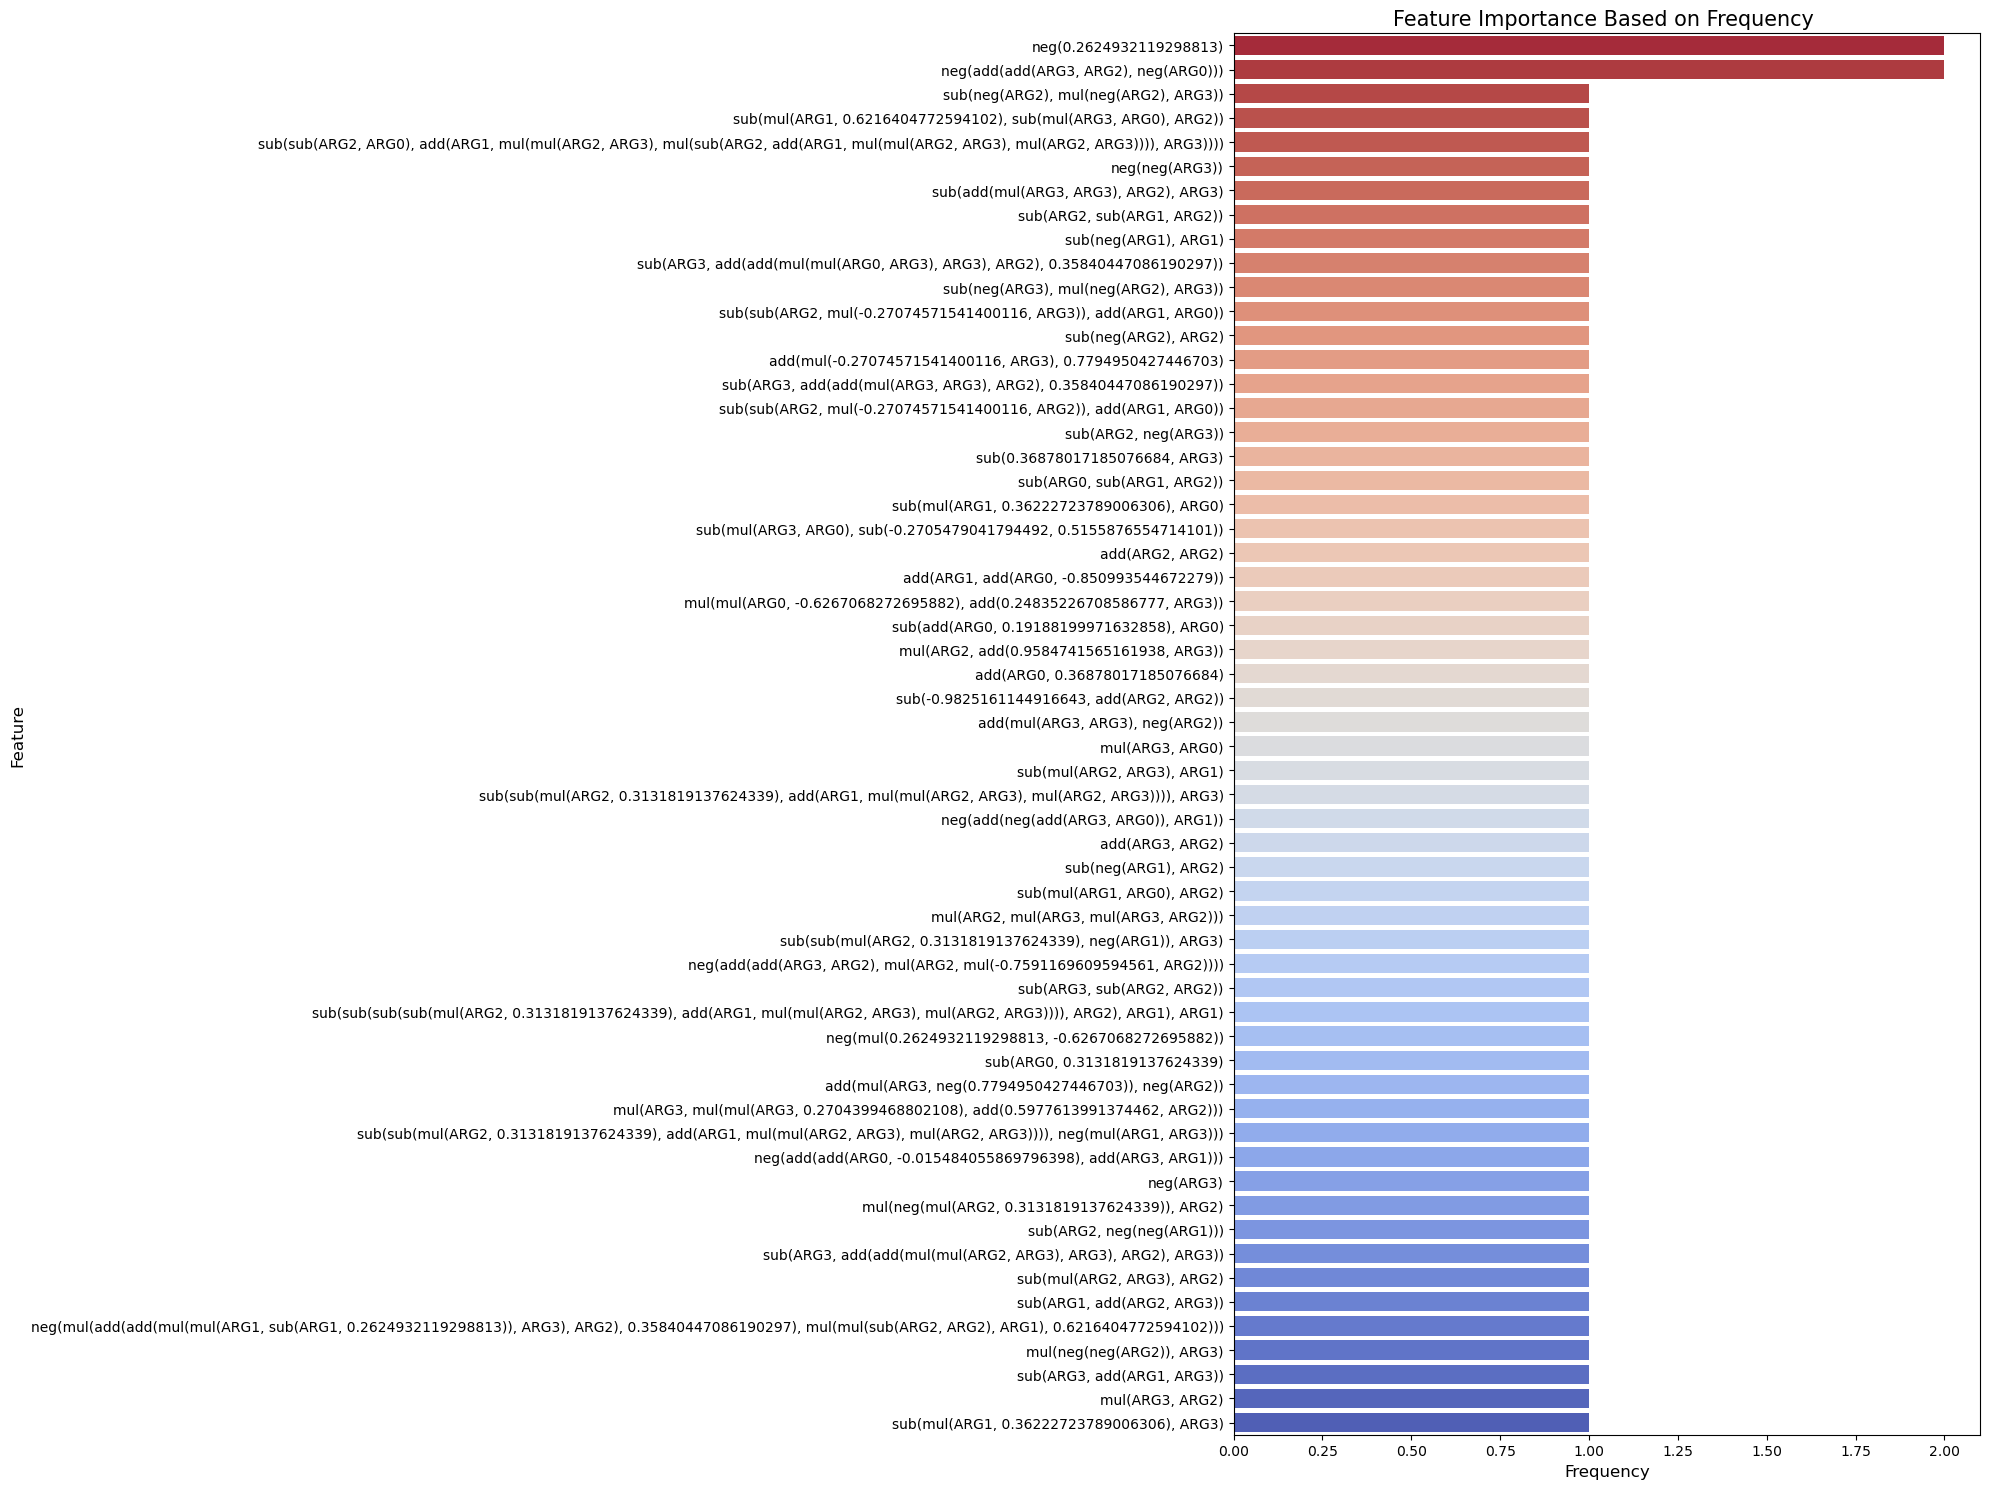

In [7]:
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 统计和可视化名人堂(Hall of Fame)中各个特征公式出现的频率
feature_frequency = defaultdict(int)

for individual in hof:
    for tree in individual:
        feature_frequency[str(tree)]+=1

features_df = pd.DataFrame(list(feature_frequency.items()), columns=["Feature", "Frequency"])

# 对特征按照频率进行排序
features_df.sort_values("Frequency", ascending=False, inplace=True)

# 绘制特征重要性图
plt.figure(figsize=(20, 15))
palette = sns.color_palette("coolwarm", len(features_df))[::-1]
sns.barplot(x="Frequency", y="Feature", data=features_df, palette=palette)
plt.title("Feature Importance Based on Frequency ", fontsize=15)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout() 
plt.show()